# The purpose is to show the Pickles UVK

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic',\
               'k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[9],'dat_uvk')

In [11]:
filelist=os.listdir(SEDfile_dir) 

In [12]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

In [13]:
fits_files

['pickles_uk.fits',
 'pickles_uk_1.fits',
 'pickles_uk_10.fits',
 'pickles_uk_100.fits',
 'pickles_uk_101.fits',
 'pickles_uk_102.fits',
 'pickles_uk_103.fits',
 'pickles_uk_104.fits',
 'pickles_uk_105.fits',
 'pickles_uk_106.fits',
 'pickles_uk_107.fits',
 'pickles_uk_108.fits',
 'pickles_uk_109.fits',
 'pickles_uk_11.fits',
 'pickles_uk_110.fits',
 'pickles_uk_111.fits',
 'pickles_uk_112.fits',
 'pickles_uk_113.fits',
 'pickles_uk_114.fits',
 'pickles_uk_115.fits',
 'pickles_uk_116.fits',
 'pickles_uk_117.fits',
 'pickles_uk_118.fits',
 'pickles_uk_119.fits',
 'pickles_uk_12.fits',
 'pickles_uk_120.fits',
 'pickles_uk_121.fits',
 'pickles_uk_122.fits',
 'pickles_uk_123.fits',
 'pickles_uk_124.fits',
 'pickles_uk_125.fits',
 'pickles_uk_126.fits',
 'pickles_uk_127.fits',
 'pickles_uk_128.fits',
 'pickles_uk_129.fits',
 'pickles_uk_13.fits',
 'pickles_uk_130.fits',
 'pickles_uk_131.fits',
 'pickles_uk_14.fits',
 'pickles_uk_15.fits',
 'pickles_uk_16.fits',
 'pickles_uk_17.fits',
 'pick

In [14]:
fits_files.remove('pickles_uk.fits')

## Find the star-names in the files

In [15]:
obj_headers = []
obj_files = []
for filename in fits_files:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [16]:
obj_headers[0]

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
DATE    = '2007-01-11T21:02:17' / Date FITS file was generated                  
IRAF-TLM= '16:02:33 (11/01/2007)' / Time of last modification                   
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'STScI-STSDAS/TABLES' / Tables version 2002-02-22                     
FILENAME= 'pickles_uk_1.fits'  / name of file                                   
NEXTEND =                    1 / number of extensions in file                   
COMMENT1= 'spectral type: O5V'                                                  
COMMENT2= 'metallicity: sola

In [17]:
#obj_names = []
#index=0
#for hdr in obj_headers: 
#        obj_name=obj_headers[index]['TARGETID']
#        obj_names.append(obj_name)
#        index+=1

In [18]:
#obj_names

In [19]:
fits_files[:5]

['pickles_uk_1.fits',
 'pickles_uk_10.fits',
 'pickles_uk_100.fits',
 'pickles_uk_101.fits',
 'pickles_uk_102.fits']

In [20]:
obj_names2 = []
index=0
for thefile in fits_files:
    #thenames=re.findall('^bk_([a-z][0-9]+).fits$',thefile)
    thenames=re.findall('^(.*).fits$',thefile) 
    if(len(thenames)>0):
        obj_names2.append(thenames[0])
    else:
        print 'bad file ',thefile
    index+=1

In [21]:
print obj_names2

['pickles_uk_1', 'pickles_uk_10', 'pickles_uk_100', 'pickles_uk_101', 'pickles_uk_102', 'pickles_uk_103', 'pickles_uk_104', 'pickles_uk_105', 'pickles_uk_106', 'pickles_uk_107', 'pickles_uk_108', 'pickles_uk_109', 'pickles_uk_11', 'pickles_uk_110', 'pickles_uk_111', 'pickles_uk_112', 'pickles_uk_113', 'pickles_uk_114', 'pickles_uk_115', 'pickles_uk_116', 'pickles_uk_117', 'pickles_uk_118', 'pickles_uk_119', 'pickles_uk_12', 'pickles_uk_120', 'pickles_uk_121', 'pickles_uk_122', 'pickles_uk_123', 'pickles_uk_124', 'pickles_uk_125', 'pickles_uk_126', 'pickles_uk_127', 'pickles_uk_128', 'pickles_uk_129', 'pickles_uk_13', 'pickles_uk_130', 'pickles_uk_131', 'pickles_uk_14', 'pickles_uk_15', 'pickles_uk_16', 'pickles_uk_17', 'pickles_uk_18', 'pickles_uk_19', 'pickles_uk_2', 'pickles_uk_20', 'pickles_uk_21', 'pickles_uk_22', 'pickles_uk_23', 'pickles_uk_24', 'pickles_uk_25', 'pickles_uk_26', 'pickles_uk_27', 'pickles_uk_28', 'pickles_uk_29', 'pickles_uk_3', 'pickles_uk_30', 'pickles_uk_31', '

In [22]:
obj_names=obj_names2

In [23]:
print obj_files

['pickles_uk_1.fits', 'pickles_uk_10.fits', 'pickles_uk_100.fits', 'pickles_uk_101.fits', 'pickles_uk_102.fits', 'pickles_uk_103.fits', 'pickles_uk_104.fits', 'pickles_uk_105.fits', 'pickles_uk_106.fits', 'pickles_uk_107.fits', 'pickles_uk_108.fits', 'pickles_uk_109.fits', 'pickles_uk_11.fits', 'pickles_uk_110.fits', 'pickles_uk_111.fits', 'pickles_uk_112.fits', 'pickles_uk_113.fits', 'pickles_uk_114.fits', 'pickles_uk_115.fits', 'pickles_uk_116.fits', 'pickles_uk_117.fits', 'pickles_uk_118.fits', 'pickles_uk_119.fits', 'pickles_uk_12.fits', 'pickles_uk_120.fits', 'pickles_uk_121.fits', 'pickles_uk_122.fits', 'pickles_uk_123.fits', 'pickles_uk_124.fits', 'pickles_uk_125.fits', 'pickles_uk_126.fits', 'pickles_uk_127.fits', 'pickles_uk_128.fits', 'pickles_uk_129.fits', 'pickles_uk_13.fits', 'pickles_uk_130.fits', 'pickles_uk_131.fits', 'pickles_uk_14.fits', 'pickles_uk_15.fits', 'pickles_uk_16.fits', 'pickles_uk_17.fits', 'pickles_uk_18.fits', 'pickles_uk_19.fits', 'pickles_uk_2.fits', '

In [24]:
objames_and_objfiles = zip(obj_names, obj_files)

## Make a dictionary of filenames

In [25]:
OBJDict= {}
for obj,thefile in objames_and_objfiles:
    print obj,': '
    OBJDict[obj]=thefile
    print OBJDict[obj] 

pickles_uk_1 : 
pickles_uk_1.fits
pickles_uk_10 : 
pickles_uk_10.fits
pickles_uk_100 : 
pickles_uk_100.fits
pickles_uk_101 : 
pickles_uk_101.fits
pickles_uk_102 : 
pickles_uk_102.fits
pickles_uk_103 : 
pickles_uk_103.fits
pickles_uk_104 : 
pickles_uk_104.fits
pickles_uk_105 : 
pickles_uk_105.fits
pickles_uk_106 : 
pickles_uk_106.fits
pickles_uk_107 : 
pickles_uk_107.fits
pickles_uk_108 : 
pickles_uk_108.fits
pickles_uk_109 : 
pickles_uk_109.fits
pickles_uk_11 : 
pickles_uk_11.fits
pickles_uk_110 : 
pickles_uk_110.fits
pickles_uk_111 : 
pickles_uk_111.fits
pickles_uk_112 : 
pickles_uk_112.fits
pickles_uk_113 : 
pickles_uk_113.fits
pickles_uk_114 : 
pickles_uk_114.fits
pickles_uk_115 : 
pickles_uk_115.fits
pickles_uk_116 : 
pickles_uk_116.fits
pickles_uk_117 : 
pickles_uk_117.fits
pickles_uk_118 : 
pickles_uk_118.fits
pickles_uk_119 : 
pickles_uk_119.fits
pickles_uk_12 : 
pickles_uk_12.fits
pickles_uk_120 : 
pickles_uk_120.fits
pickles_uk_121 : 
pickles_uk_121.fits
pickles_uk_122 : 
pick

## Plot the SED

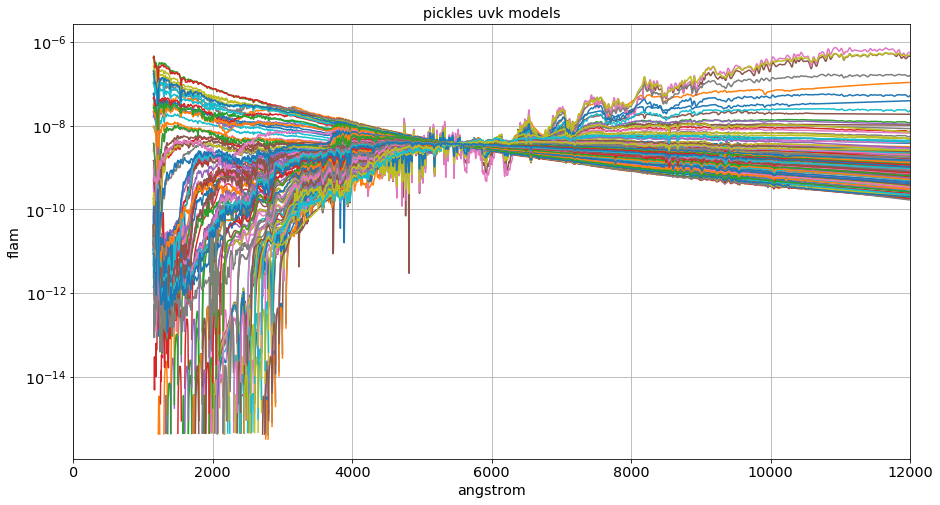

In [26]:
for keyobj in OBJDict:
    the_file=OBJDict[keyobj]
        
    selected_file=the_file
    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
    sed=S.FileSpectrum(selected_fullfile)
        
    plt.semilogy(sed.wave,sed.flux,label=keyobj)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    #plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("pickles uvk models")
    plt.savefig("pickles-uvk.png")